In [70]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pylab as plt
from datetime import datetime
import re


## Loading data

In [71]:
# Specify which year you would like to access
year = 2015 

# Setting the path to the year
dataframe_path = os.path.join(os.getcwd(),'data_sample','IMDb_%d'%year,'processced_data_%d.csv'%year)

# Reading data
data = pd.read_csv(dataframe_path)

# Drop an unwanted column
data.drop(columns='Unnamed: 0',inplace=True)

# Set table index to IMDb code
data.set_index('IMDB_code_GS', inplace=True)

# Now you good to go
data.head()

,Movie_Name_GS,Also_Known_As_AKAS_GS,Also_Known_As_COUNTRIES_AKAS_GS,Year_GS,Runtime_min_GS,Sound_Mix_GS,Color_GS,Aspect_Ratio_GS,Popularity_GS,Popularity_up_or_down_GS,...,AllAges_FEMALE_SCORE_DEMOGRAPHIC_GG_RATING,AllAges_FEMALE_NUM_DEMOGRAPHIC_GG_RATING,Under_18_FEMALE_SCORE_DEMOGRAPHIC_GG_RATING,Under_18_FEMALE_NUM_DEMOGRAPHIC_GG_RATING,18_29_FEMALE_SCORE_DEMOGRAPHIC_GG_RATING,18_29_FEMALE_NUM_DEMOGRAPHIC_GG_RATING,30_44_FEMALE_SCORE_DEMOGRAPHIC_GG_RATING,30_44_FEMALE_NUM_DEMOGRAPHIC_GG_RATING,Over_45_FEMALE_SCORE_DEMOGRAPHIC_GG_RATING,Over_45_FEMALE_NUM_DEMOGRAPHIC_GG_RATING
IMDB_code_GS,,,,,,,,,,,,,,,,,,,,,
tt1392190,Mad Max: Fury Road,"Mad Max: Fury Road,Mad Max: Furia en el camino...","Argentina,Australia,Australia,Belgium,Brazil,B...",2015.0,120.0,"Dolby Digital,Datasat,SDDS,Dolby Atmos","Color,Black and White(black and chrome edition)",2.35 : 1,66.0,-23.0,...,7.9,86123.0,7.5,70.0,8.1,33446.0,7.8,37238.0,7.4,6963.0
tt2488496,Star Wars: Episode VII - The Force Awakens,"Star Wars: Episode VII The Force Awakens,Star...",NaN,2015.0,138.0,"12-Track Digital Sound(IMAX 12 track),Dolby At...",Color,2.39 : 1,356.0,-71.0,...,8.1,82158.0,7.8,129.0,8.2,29917.0,8.1,34435.0,8.1,9142.0
tt3659388,The Martian,"The Martian,Marsiani,Misión Rescate,The Martia...","Albania,Argentina,Australia,Brazil,Bulgaria,Ca...",2015.0,144.0,"Dolby Digital,Dolby Atmos,Dolby Surround 7.1,D...",Color,2.35 : 1,265.0,-5.0,...,8.0,88505.0,7.4,108.0,8.1,33044.0,7.9,37778.0,8.1,8698.0
tt2395427,Avengers: Age of Ultron,"Avengers: Age of Ultron,Avengers : Epoka e Ult...","Albania,Argentina,Australia,Azerbaijan,Azerbai...",2015.0,141.0,"Dolby Atmos,Dolby Digital,Dolby Surround 7.1,D...",Color,2.39 : 1,218.0,-32.0,...,7.6,80350.0,7.7,161.0,7.7,33505.0,7.5,31235.0,7.6,6526.0
tt1663202,The Revenant,"The RevenpNaNt,RevenpNaNt: El Renacido,The Rev...","Argentina,Australia,Brazil,Bulgaria,Canada,Chi...",2015.0,156.0,"Dolby Digital,Dolby Atmos,Dolby Surround 7.1,1...",Color,2.39 : 1,197.0,42.0,...,7.8,76652.0,7.6,84.0,7.9,28856.0,7.7,32978.0,7.8,6827.0


## After reading the data successfully, you can access the data using wild cards below.

* _GS
    - _RELATED_MOVIES_GS
    - _KEYWORDS_GS
    
* _GENRE
    - _SET_GENRE
    - _HOTVECTOR_GENRE
* _COUNTRY
    - _SET_COUNTRY
    - _NONGEO_DIS_COUNTRY
    - _GEO_DIS_COUNTRY
    - _HOTVECTOR_COUNTRY
* _LANGUAGE
     - _SET_LANGUAGE
     - _PVALUE_LANGUAGE
     - _GOOGLE_RES_LANGUAGE
     - _HOTVECTOR_LANGUAGE
* _BOXOFFICE
* _DWSC
    - _GOOGLE_RES_DWSC
* _RATING
    - G_RATING
    - _DIST_RATING
    
    - _DEMOGRAPHIC_DIST_RATING
        - _NUM_DEMOGRAPHIC_DIST_RATING
        - _PERCENT_DEMOGRAPHIC_DIST_RATING
    - _DEMOGRAPHIC_GIS_RATING
    
        - _SCORE_DEMOGRAPHIC_GIS_RATING
        - _NUM_DEMOGRAPHIC_GIS_RATING
    
    - _GG_RATING
    
        - _SCORE_DEMOGRAPHIC_GG_RATING
            * _ALLGENDER_SCORE_DEMOGRAPHIC_GG_RATING
            * _MALE_SCORE_DEMOGRAPHIC_GG_RATING
            * _FEMALE_SCORE_DEMOGRAPHIC_GG_RATING
        - _NUM_DEMOGRAPHIC_GG_RATING
            * _ALLGENDER_NUM_DEMOGRAPHIC_GG_RATING
            * _MALE_NUM_DEMOGRAPHIC_GG_RATING
            * _FEMALE_NUM_DEMOGRAPHIC_GG_RATING

## You can also filter column names with the funtion below

In [72]:
def key2intex(col_key, dataframe):
    table_keys = dataframe.keys()
    return list(re.findall(r'\w+%s'%col_key,' '.join(table_keys).replace('-','_')))


##  General Set (`_GS`)

#### General information about the title

In [73]:
# GS columns
key2intex('_GS', data);

In [74]:
key2intex('_GENRE', data);

In [75]:
key2intex('_COUNTRY', data);

In [76]:
key2intex('_LANGUAGE', data);

In [77]:
key2intex('_BOXOFFICE', data);

In [78]:
key2intex('_DWSC', data);

In [79]:
key2intex('_RATING', data);

## Sample Analysis

### mean of the votes that each genre has recieved

In [80]:
cer_from = 0
cer_upto = len(data) # Up and not including

certificates = data['Certificate_PG'].unique().astype(str)

In [81]:
certificate_stat = dict()

for certificate in certificates:
    if certificate != 'nan':
        certificate_stat[certificate] = data['Certificate_PG'][cer_from:cer_upto][data['Certificate_PG'][cer_from:cer_upto] == certificate].count()


In [82]:
certificate_stat = {k: v for k, v in sorted(certificate_stat.items(), key=lambda item: item[1], reverse=True)}

In [83]:
certificate_stat

{'PG-13': 5, 'R': 4, 'PG': 1}

### correlations of demographic groups

In [99]:
index_rating= key2intex('RATING',data)

In [100]:
table_rating = data[index_rating]

In [101]:
index_rating_dis_precent = key2intex('_PERCENT_DEMOGRAPHIC_DIST_RATING',data) 

In [102]:
index_rating_demo_score = key2intex('_SCORE_DEMOGRAPHIC_GG_RATING', data)

In [103]:
index_NUM_PG_score = key2intex('_NUM_PG', data)

In [104]:
certificate_rate_group = data[index_rating_demo_score+['Certificate_PG']].groupby('Certificate_PG')

In [105]:
lables = ['IMDB rating', 'Arithmetic mean rating',
       'All Gender, All Ages',
       'All Gender, Under 18',
       'All Gender, 18-29',
       'All Gender, 30-44',
       'All Gender, Over-45',
       'Male, All Ages',
       'Male, Under 18',
       'Male, 18-29',
       'Male, 30-44',
       'Male, Over 45',
       'Female, All Ages',
       'Female, Under 18',
       'Female, 18-29',
       'Female, 30-44',
       'Female, Over 45']

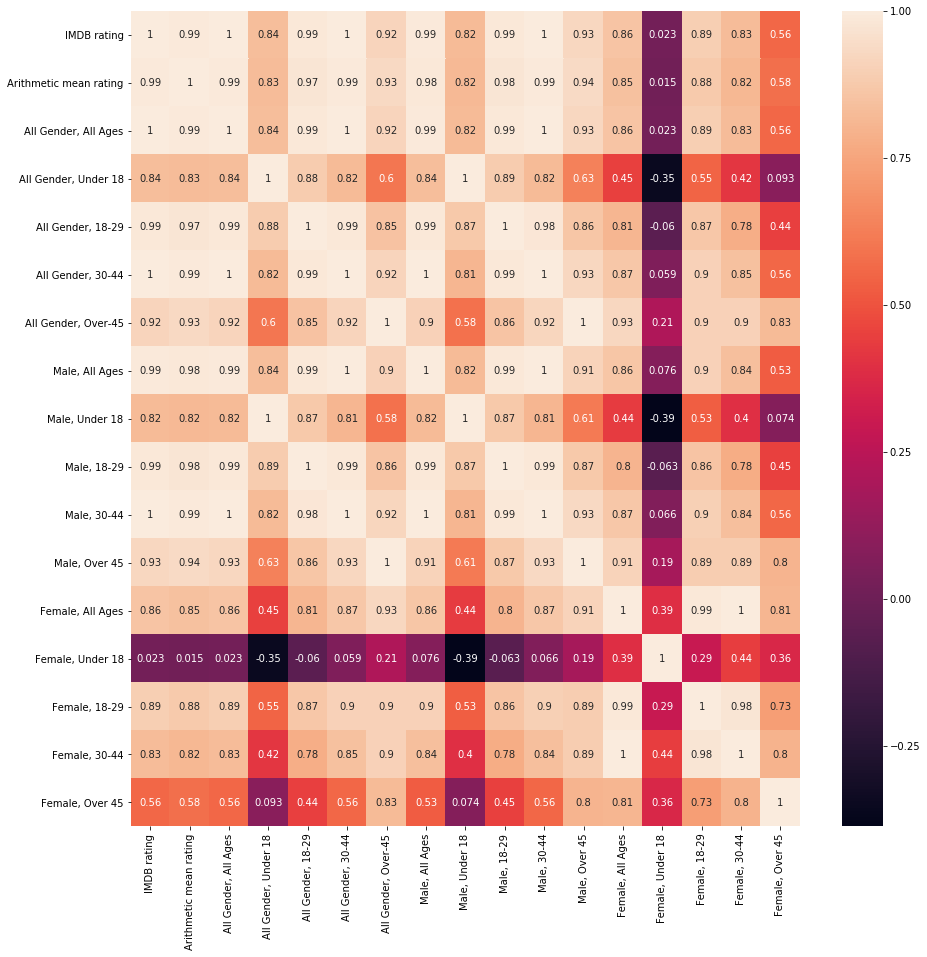

In [106]:
data4plot = ['IMDB_rating_G_RATING','Arithmetic_mean_G_RATING']+index_rating_demo_score 
corr = data[data4plot].corr()
fig, ax = plt.subplots(figsize=(15, 15))
xticklabels=lables
yticklabels=lables

ax = sns.heatmap(corr,  annot=True, xticklabels=xticklabels, yticklabels=yticklabels)
plt.savefig('sex_age_heatmap.pdf', DPI=300)